# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
from scipy.stats import linregress

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import the OpenWeatherMap API key
sys.path.append("../")
from api_keys import weather_api_key

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | henryetta
Processing Record 2 of Set 1 | chichimila
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | kamaishi
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | aginskoye
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | qaqortoq
Processing Record 10 of Set 1 | calama
Processing Record 11 of Set 1 | deschutes river woods
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | bubaque
Processing Record 14 of Set 1 | copala
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | santa ana de yacuma
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | pico truncado
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | tura
Processing Record 22 of

Processing Record 39 of Set 4 | nogliki
Processing Record 40 of Set 4 | fallon
Processing Record 41 of Set 4 | rampur
Processing Record 42 of Set 4 | sanya
Processing Record 43 of Set 4 | xiangxiang
Processing Record 44 of Set 4 | markovo
Processing Record 45 of Set 4 | port alfred
Processing Record 46 of Set 4 | robertsport
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | iskateley
Processing Record 49 of Set 4 | valday
Processing Record 0 of Set 5 | bechar
Processing Record 1 of Set 5 | mount pearl
Processing Record 2 of Set 5 | olonkinbyen
Processing Record 3 of Set 5 | abraham's bay
City not found. Skipping...
Processing Record 4 of Set 5 | howard springs
Processing Record 5 of Set 5 | sinabang
Processing Record 6 of Set 5 | ciutadella
Processing Record 7 of Set 5 | ulladulla
Processing Record 8 of Set 5 | cockburn town
Processing Record 9 of Set 5 | armacao de buzios
Processing Record 10 of Set 5 | college
Processing Record 11 of Set 5 | novodvinsk
Processing

Processing Record 28 of Set 8 | san jose
Processing Record 29 of Set 8 | boca do acre
Processing Record 30 of Set 8 | batie
Processing Record 31 of Set 8 | oranjemund
Processing Record 32 of Set 8 | saynshand
Processing Record 33 of Set 8 | volksrust
Processing Record 34 of Set 8 | zaxo
Processing Record 35 of Set 8 | kolonia
Processing Record 36 of Set 8 | sola
Processing Record 37 of Set 8 | sines
Processing Record 38 of Set 8 | shingu
Processing Record 39 of Set 8 | sishilichengzi
City not found. Skipping...
Processing Record 40 of Set 8 | zaragoza
Processing Record 41 of Set 8 | jijiga
Processing Record 42 of Set 8 | port saint john's
Processing Record 43 of Set 8 | choyr
Processing Record 44 of Set 8 | st. john's
Processing Record 45 of Set 8 | bodden town
Processing Record 46 of Set 8 | mooloolaba
Processing Record 47 of Set 8 | bouarfa
Processing Record 48 of Set 8 | burela de cabo
Processing Record 49 of Set 8 | yemva
Processing Record 0 of Set 9 | fale old settlement
Processin

Processing Record 18 of Set 12 | sorong
Processing Record 19 of Set 12 | aleg
Processing Record 20 of Set 12 | yala
Processing Record 21 of Set 12 | sol'-iletsk
Processing Record 22 of Set 12 | bamboo flat
Processing Record 23 of Set 12 | guanica
Processing Record 24 of Set 12 | ambalangoda
Processing Record 25 of Set 12 | pitimbu
Processing Record 26 of Set 12 | yigo village
Processing Record 27 of Set 12 | quellon
Processing Record 28 of Set 12 | duong dong
Processing Record 29 of Set 12 | nemuro
Processing Record 30 of Set 12 | kotido
Processing Record 31 of Set 12 | key west
Processing Record 32 of Set 12 | tidjikja
Processing Record 33 of Set 12 | gannat
Processing Record 34 of Set 12 | tonnerre
Processing Record 35 of Set 12 | fish town
Processing Record 36 of Set 12 | mandal
Processing Record 37 of Set 12 | tromso
Processing Record 38 of Set 12 | sikasso
Processing Record 39 of Set 12 | nema
Processing Record 40 of Set 12 | miahuatlan de porfirio diaz
Processing Record 41 of Set

In [6]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0      henryetta  35.4398  -95.9819     17.01        52          99   
1     chichimila  20.6167  -88.2167     31.03        57          94   
2  blackmans bay -43.0167  147.3167     10.07        84         100   
3       kamaishi  39.2667  141.8833     14.12        77          43   
4       waitangi -43.9535 -176.5597     12.12        91           2   

   Wind Speed Country        Date  
0        6.92      US  1697212689  
1        2.56      MX  1697212689  
2        0.89      AU  1697212690  
3        3.58      JP  1697212690  
4        3.13      NZ  1697212690

In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Rename Max Temp column 
city_data_df.rename(columns = {"Max Temp": "temp"}, inplace = True)

# Display sample data
city_data_df.head()

City      Lat       Lng   temp  Humidity  Cloudiness  \
City_ID                                                                  
0            henryetta  35.4398  -95.9819  17.01        52          99   
1           chichimila  20.6167  -88.2167  31.03        57          94   
2        blackmans bay -43.0167  147.3167  10.07        84         100   
3             kamaishi  39.2667  141.8833  14.12        77          43   
4             waitangi -43.9535 -176.5597  12.12        91           2   

         Wind Speed Country        Date  
City_ID                                  
0              6.92      US  1697212689  
1              2.56      MX  1697212689  
2              0.89      AU  1697212690  
3              3.58      JP  1697212690  
4              3.13      NZ  1697212690

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

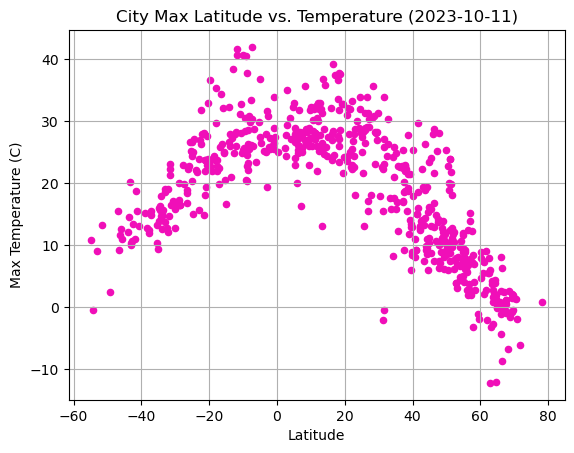

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = "Lat", 
                          y = "temp", 
                          color = "#f00fb8", 
                          xlabel = "Latitude", 
                          ylabel = "Max Temperature (C)", 
                          title = "City Max Latitude vs. Temperature (2023-10-11)", 
                          grid = True)



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

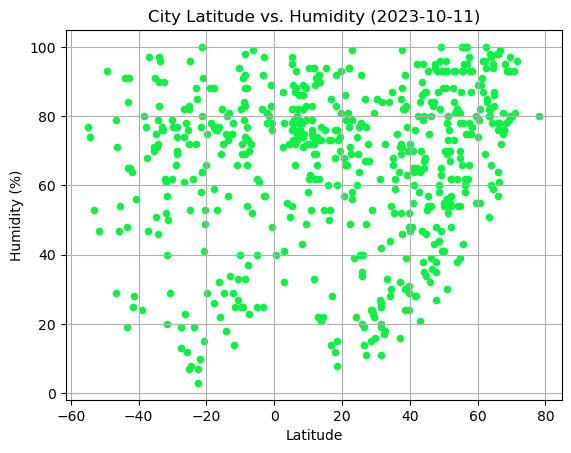

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = "Lat", 
                          y = "Humidity", 
                          color = "#0FF047",  
                          xlabel = "Latitude", 
                          ylabel = "Humidity (%)", 
                          title = "City Latitude vs. Humidity (2023-10-11)", 
                          grid = True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

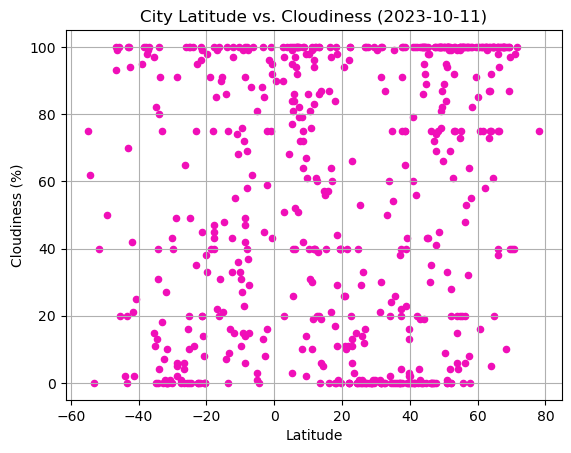

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = "Lat", 
                          y = "Cloudiness", 
                          color = "#f00fb8", 
                          xlabel = "Latitude", 
                          ylabel = "Cloudiness (%)", 
                          title = "City Latitude vs. Cloudiness (2023-10-11)", 
                          grid = True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

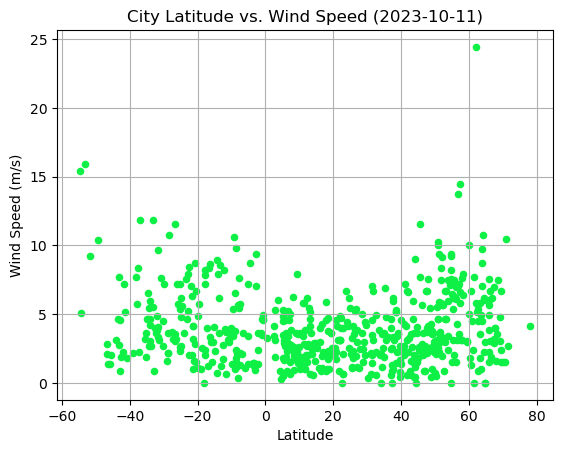

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = "Lat", 
                          y = "Wind Speed", 
                          color = "#0FF047",  
                          xlabel = "Latitude", 
                          ylabel = "Wind Speed (m/s)", 
                          title = "City Latitude vs. Wind Speed (2023-10-11)", 
                          grid = True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def getLR(x: list, 
          y: list, 
          color: str = "blue", 
          title: str = "", 
          xlabel: str = "", 
          ylabel: str = "", 
          eq_color: str = "red",
          eq_position: list = (0,0), 
          reg_line_color: str = "red"):
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    # Get regression values
    regress_values = x * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")
    # Create Plot
    plt.scatter(x,y, color = color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq, eq_position, fontsize=15, color = eq_color)
    # Create regeression line
    plt.plot(x,regress_values, color = reg_line_color)
    plt.show()
   



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng   temp  Humidity  Cloudiness  \
City_ID                                                               
0         henryetta  35.4398  -95.9819  17.01        52          99   
1        chichimila  20.6167  -88.2167  31.03        57          94   
3          kamaishi  39.2667  141.8833  14.12        77          43   
5         aginskoye  51.1000  114.5300   9.67        54          94   
7          thompson  55.7435  -97.8558   6.09        93           0   

         Wind Speed Country        Date  
City_ID                                  
0              6.92      US  1697212689  
1              2.56      MX  1697212689  
3              3.58      JP  1697212690  
5              2.89      RU  1697212690  
7              2.06      CA  1697212661

In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng   temp  Humidity  Cloudiness  \
City_ID                                                                  
2        blackmans bay -43.0167  147.3167  10.07        84         100   
4             waitangi -43.9535 -176.5597  12.12        91           2   
6            adamstown -25.0660 -130.1015  20.39        72         100   
9               calama -22.4667  -68.9333  26.27         3           0   
11          bredasdorp -34.5322   20.0403  15.76        71          13   

         Wind Speed Country        Date  
City_ID                                  
2              0.89      AU  1697212690  
4              3.13      NZ  1697212690  
6              5.35      PN  1697212690  
9              2.06      CL  1697212690  
11             4.64      ZA  1697212691

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8530126980983971


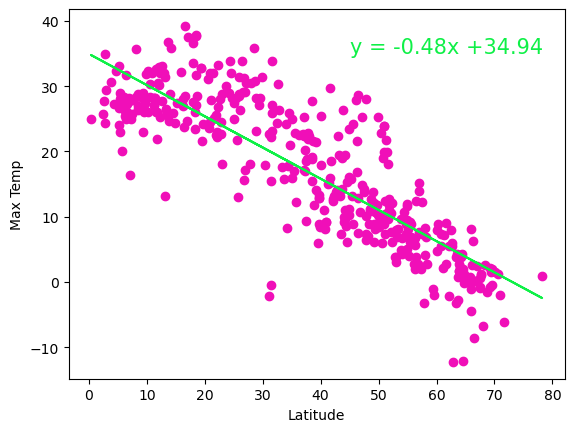

In [44]:
# Linear regression on Northern Hemisphere
getLR(northern_hemi_df.Lat, 
      northern_hemi_df.temp, 
      color = "#f00fb8",   
      xlabel = "Latitude",     
      ylabel = "Max Temp",     
      eq_color = "#0FF047", 
      reg_line_color = "#0FF047", 
      eq_position = (45, 35))

The r-value is: 0.781348124489428


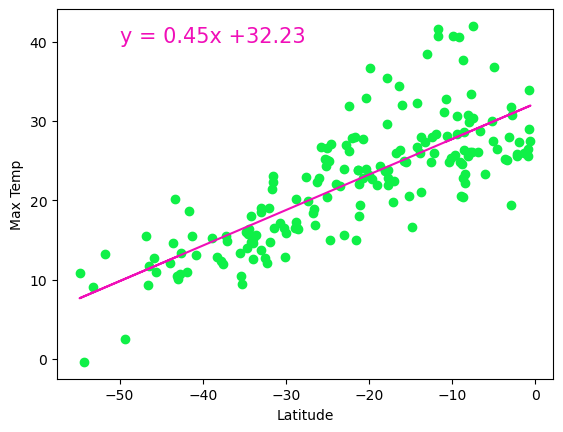

In [50]:
# Linear regression on Southern Hemisphere
getLR(southern_hemi_df.Lat, 
      southern_hemi_df.temp, 
      color = "#0FF047",   
      xlabel = "Latitude",     
      ylabel = "Max Temp",     
      eq_color = "#f00fb8", 
      reg_line_color = "#f00fb8", 
      eq_position = (-50, 40))

**Discussion about the linear relationship:** 
<p>There is a strong positive correlation between the latitude values and temperature in the Northern hemisphere. The Southern hemisphere temperature and latitude also have strong correlation, but unlike in the Northern hemisphere, it's negative.</p>

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16187762708936848


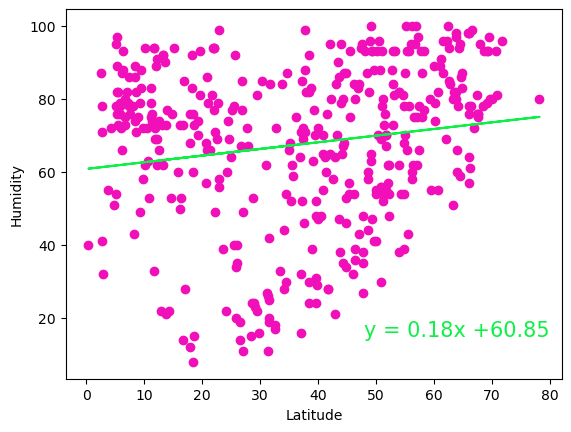

In [55]:
# Northern Hemisphere
getLR(northern_hemi_df.Lat, 
      northern_hemi_df.Humidity, 
      color = "#f00fb8",   
      xlabel = "Latitude",     
      ylabel = "Humidity",     
      eq_color = "#0FF047", 
      reg_line_color = "#0FF047", 
      eq_position = (48, 15))

The r-value is: 0.03168755045495262


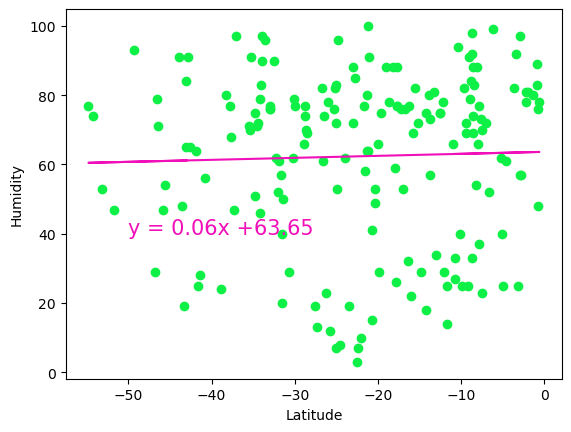

In [56]:
# Southern Hemisphere
getLR(southern_hemi_df.Lat, 
      southern_hemi_df.Humidity, 
      color = "#0FF047",   
      xlabel = "Latitude",     
      ylabel = "Humidity",     
      eq_color = "#f00fb8", 
      reg_line_color = "#f00fb8", 
      eq_position = (-50, 40))

**Discussion about the linear relationship:**
<p>There is almost no correlation between the latitude and humidity in the either hemisphere.</p>

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17651189678678111


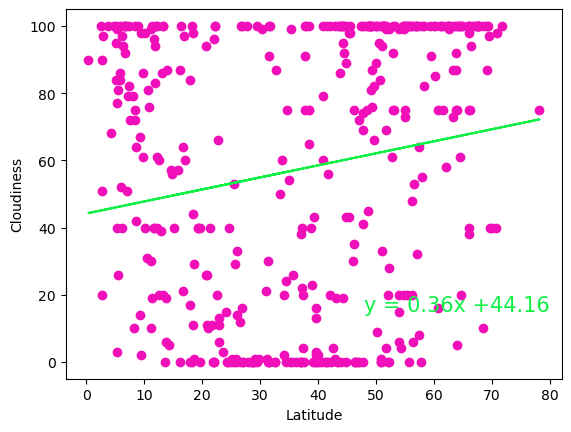

In [57]:
# Northern Hemisphere
getLR(northern_hemi_df.Lat, 
      northern_hemi_df.Cloudiness, 
      color = "#f00fb8",   
      xlabel = "Latitude",     
      ylabel = "Cloudiness",     
      eq_color = "#0FF047", 
      reg_line_color = "#0FF047", 
      eq_position = (48, 15))

The r-value is: 0.08365951262871775


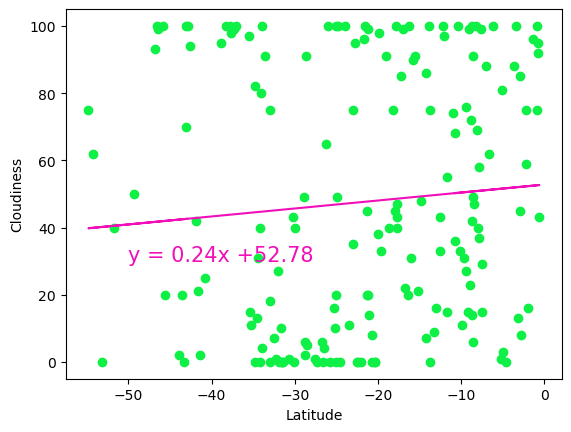

In [59]:
# Southern Hemisphere
getLR(southern_hemi_df.Lat, 
      southern_hemi_df.Cloudiness, 
      color = "#0FF047",   
      xlabel = "Latitude",     
      ylabel = "Cloudiness",     
      eq_color = "#f00fb8", 
      reg_line_color = "#f00fb8", 
      eq_position = (-50, 30))

**Discussion about the linear relationship:**
<p>There is almost no correlation between the latitude and cloudiness in either hemispheres.</p>

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.29360154581718967


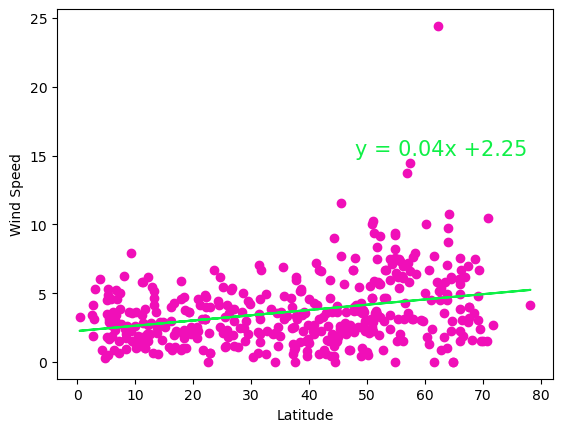

In [60]:
# Northern Hemisphere
getLR(northern_hemi_df.Lat, 
      northern_hemi_df["Wind Speed"], 
      color = "#f00fb8",   
      xlabel = "Latitude",     
      ylabel = "Wind Speed",     
      eq_color = "#0FF047", 
      reg_line_color = "#0FF047", 
      eq_position = (48, 15))

The r-value is: -0.21116267295839142


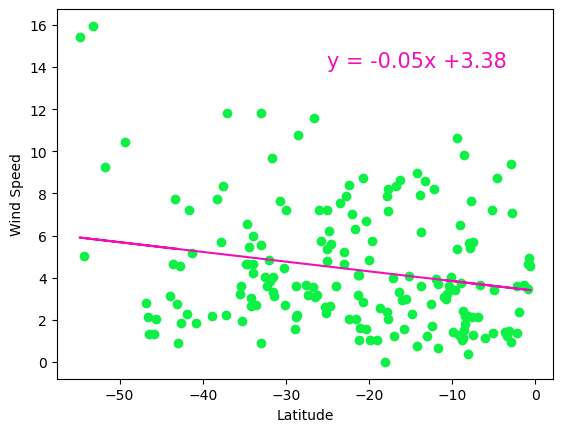

In [64]:
# Southern Hemisphere
getLR(southern_hemi_df.Lat, 
      southern_hemi_df["Wind Speed"], 
      color = "#0FF047",   
      xlabel = "Latitude",     
      ylabel = "Wind Speed",     
      eq_color = "#f00fb8", 
      reg_line_color = "#f00fb8", 
      eq_position = (-25, 14))

**Discussion about the linear relationship:**
<p>There is a weak correlation between the latitude and wind speed in both hemispheres. It's a negative correlation in Southern hemisphere and positive in the Northern one.</p>